In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/automobileEDA.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

In [10]:
# khai báo thư viện Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
my_step = [
    ('scale', StandardScaler()),
    ('poly2degree', PolynomialFeatures(degree=2)),
    ('buildmodel', LinearRegression())
]

In [8]:
pipe = Pipeline(my_step)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('poly2degree', PolynomialFeatures()),
                ('buildmodel', LinearRegression())])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2) # -> 80:20

In [12]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('poly2degree', PolynomialFeatures()),
                ('buildmodel', LinearRegression())])

In [13]:
ypipe = pipe.predict(X_test)

In [14]:
ypipe[0:5]

array([ 6310.712153  , 10257.86480257, 24998.27653159, 21134.43763818,
       18895.73743283])

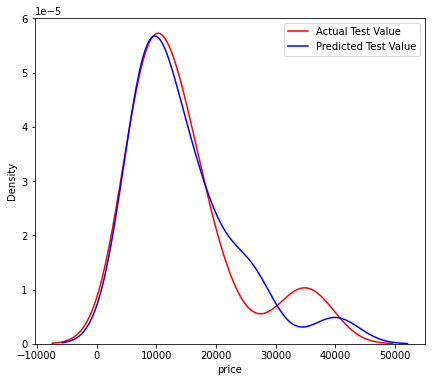

In [15]:
plt.figure(figsize=(7,6))
ax2 = sns.kdeplot(y_test, color='r', label='Actual Test Value')
sns.kdeplot(ypipe, color='b', label='Predicted Test Value', ax=ax2)
plt.legend()
plt.show()